# 5. Write a program for finding edges in an image using Sobel filter.

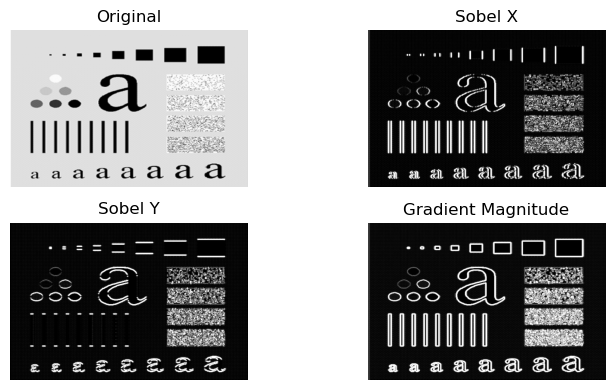

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_img(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to read image at {image_path}")
    return img

def sobel_edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

    sobel_x_disp = cv2.convertScaleAbs(sobel_x)
    sobel_y_disp = cv2.convertScaleAbs(sobel_y)

    return sobel_x_disp, sobel_y_disp, magnitude

def plot_sobel_edges(original, sobel_x, sobel_y, magnitude):
    plt.figure(figsize=(8, 4))

    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel X")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel Y")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(magnitude, cmap='gray')
    plt.title("Gradient Magnitude")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig("outimg_problem5.png")
    plt.show()

def main():
    image_path = "../test_imgs/test_img.png"  
    image = read_img(image_path)

    sobel_x, sobel_y, magnitude = sobel_edge_detection(image)
    plot_sobel_edges(image, sobel_x, sobel_y, magnitude)

if __name__ == "__main__":
    main()
